In [39]:
import harmonics as h
import numpy as np
import pandas as pd

In [16]:


dic = {
        49: 'k', 57: 'K', 42: 'c', 46: 'o', 44: 'p', 51: 'r', 52: 'C',
        38: 's', 40: 'S', 37: 'x', 48: 't', 50: 'T', 45: 'm', 47: 'M',
        43: 'f', 41: 'F', 35: 'b', 36: 'B', 27: 'q', 28: 'l', 29: 'h',
        30: 'u', 31: 'i', 32: 'Q', 33: 'n', 34: 'b', 39: 'a', 53: 'R',
        54: 'T', 55: 'w', 56: 'v', 58: 'V', 60: 'g', 61: 'G', 62: 'y',
        63: 'Y', 64: 'z', 65: 'd', 66: 'D', 67: 'A', 68: 'Z', 69: 'C',
        70: 'M', 71: 'W', 72: 'L', 73: 'G', 74: 'J', 75: 'X', 76: 'H',
        77: 'N', 78: 'O', 79: 'P', 80: 'U', 81: 'I'}

with open('trials/paths/full.txt') as f:
    paths = f.readlines()
    paths = [i[:-1] for i in paths]

l = len(paths)

for i in range(l):
    print(f'{i}/{l}',end=" -> ")
    try:
        p1 = h.midi.MidiReader(paths.pop(0))
        if p1.time_signature==(4, 4) and (9 in p1.channel_list):
            def midi_to_letter(nb):
                try:
                    return dic[nb]
                except KeyError:
                    return np.nan

            df = p1.df[['channel','type','data1','beat_time']].copy()
            df = df[(df['channel'] == 9) & (df['type'] == 'note_on')].loc[:,['data1','beat_time']]
            df['time'] = (df['beat_time']).apply(lambda x : round(x*48))
            start = df['time'][df.index[0]]
            df['time'] = df['time'].apply(lambda x : x - start)
            df['letter'] = df['data1'].apply(midi_to_letter)
            df.dropna(inplace=True)
            df = df[['time','letter']]

            notes = df['letter'].to_list()
            deltas = list(np.diff(df['time']))

            output = '^'
            while len(deltas):
                d = deltas.pop(0)
                if d:
                    output += f".{d}."
                output += notes.pop(0)
            output += '.$'
            if output[:2] != '^.':
                output = '^.'+output[1:]
            with open('/home/matias/git/harmonics/trials/output_f/lakh_clean_drum.txt','a') as file:
                file.write(output)
    except:
        pass

0/17259 -> extraction took 0.3115971088409424 seconds
1/17259 -> extraction took 0.5429861545562744 seconds
2/17259 -> extraction took 0.542902946472168 seconds
3/17259 -> extraction took 1.405724287033081 seconds
4/17259 -> extraction took 1.338123083114624 seconds
5/17259 -> extraction took 0.8205163478851318 seconds
6/17259 -> extraction took 1.5806443691253662 seconds
7/17259 -> extraction took 1.2317132949829102 seconds
8/17259 -> extraction took 0.5778830051422119 seconds
9/17259 -> extraction took 1.1384601593017578 seconds
10/17259 -> extraction took 0.930955171585083 seconds
11/17259 -> extraction took 1.3134701251983643 seconds
12/17259 -> extraction took 1.042572259902954 seconds
13/17259 -> extraction took 0.6179413795471191 seconds
14/17259 -> extraction took 0.8734011650085449 seconds
15/17259 -> extraction took 1.130540132522583 seconds
16/17259 -> extraction took 0.7877991199493408 seconds
17/17259 -> extraction took 0.6128840446472168 seconds
18/17259 -> extraction too

In [4]:
with open('/home/matias/git/harmonics/trials/output_f/lakh_clean_drum.txt','r') as file:
    data = file.read()


In [7]:
data = data.replace('$^','$\n^')

In [9]:
data = data.split('\n')

In [11]:
len(data)

14677

In [26]:
def get_deltas(d):
    d= d.split('.')
    d = [i for i in d if i.isnumeric()]
    return np.array(d).astype(int)

In [29]:
full = [get_deltas(i) for i in data]

In [94]:
df

,values,frequencies
0,1,592066
1,2,143513
2,3,75824
3,4,93866
4,5,35875
...,...,...
3067,29520,2
3068,29784,1
3069,35080,1
3070,40512,2


,values,frequencies,proportion
0,1,592066,0.035812
1,2,143513,0.044492
2,3,75824,0.049078
3,4,93866,0.054756
4,5,35875,0.056926
5,6,154591,0.066277
6,7,30523,0.068123
7,8,219484,0.081398
8,9,89259,0.086797
9,10,119530,0.094027


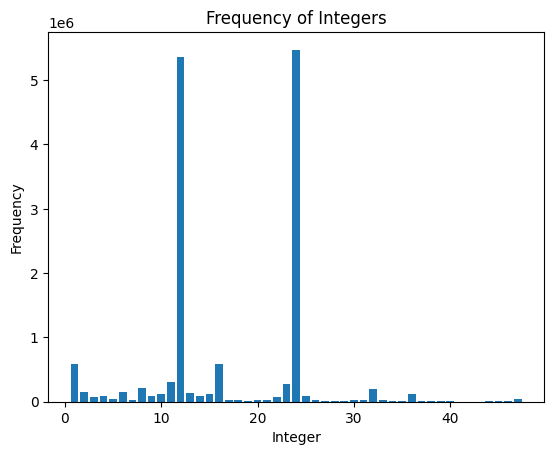

In [108]:
import matplotlib.pyplot as plt

# List of NumPy arrays
arrays = full

# Concatenate the arrays into a single NumPy array
concatenated_array = np.concatenate(arrays)

# Calculate the frequency of each integer
values, frequencies = np.unique(concatenated_array, return_counts=True)

df = pd.DataFrame({'values':values,'frequencies':frequencies})
df['proportion'] = np.cumsum(df['frequencies'].to_numpy())/df.frequencies.sum()
v = df[df['proportion'] <= 0.95]['values'].to_numpy()
f = df[df['proportion'] <= 0.95]['frequencies'].to_numpy()

# Plot the frequencies
plt.bar(v, f)
plt.xlabel('Integer')
plt.ylabel('Frequency')
plt.title('Frequency of Integers')
plt.show()

In [11]:
import numpy as np

In [1]:
from mido import MidiFile

dic = {
        49: 'k', 57: 'K', 42: 'c', 46: 'o', 44: 'p', 51: 'r', 52: 'C',
        38: 's', 40: 'S', 37: 'x', 48: 't', 50: 'T', 45: 'm', 47: 'M',
        43: 'f', 41: 'F', 35: 'b', 36: 'B', 27: 'q', 28: 'l', 29: 'h',
        30: 'u', 31: 'i', 32: 'Q', 33: 'n', 34: 'b', 39: 'a', 53: 'R',
        54: 'T', 55: 'w', 56: 'v', 58: 'V', 60: 'g', 61: 'G', 62: 'y',
        63: 'Y', 64: 'z', 65: 'd', 66: 'D', 67: 'A', 68: 'Z', 69: 'C',
        70: 'M', 71: 'W', 72: 'L', 73: 'G', 74: 'J', 75: 'X', 76: 'H',
        77: 'N', 78: 'O', 79: 'P', 80: 'U', 81: 'I'}

In [14]:
mido_file = MidiFile(paths[410])

In [29]:
for t in mido_file.tracks:
    for msg in t:
        print(msg)
        try:
            if msg.track == 9:
                print(msg)
        except:
            continue

MetaMessage('track_name', name='The Sun Always Shines On T.V.(For SC-88VL)                      ', time=0)
MetaMessage('set_tempo', tempo=454545, time=0)
MetaMessage('key_signature', key='C', time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
sysex data=(65,16,66,18,0,0,127,0,1) time=0
control_change channel=1 control=7 value=110 time=0
control_change channel=2 control=7 value=127 time=0
control_change channel=3 control=7 value=127 time=0
control_change channel=4 control=7 value=110 time=0
control_change channel=4 control=0 value=8 time=0
control_change channel=4 control=32 value=0 time=0
program_change channel=4 program=49 time=0
control_change channel=4 control=10 value=44 time=0
control_change channel=4 control=11 value=100 time=0
control_change channel=4 control=91 value=127 time=0
control_change channel=4 control=93 value=127 time=0
control_change channel=4 control=1 value=50 time=0
control_change channel=5

In [6]:
enumerate.__doc__.__str__()

'Return an enumerate object.\n\n  iterable\n    an object supporting iteration\n\nThe enumerate object yields pairs containing a count (from start, which\ndefaults to zero) and a value yielded by the iterable argument.\n\nenumerate is useful for obtaining an indexed list:\n    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...'